In [33]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
# DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('news.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [35]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [36]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [37]:
df['label'].nunique()

2

In [38]:
def remove_non_alphabetic(text):
    return re.sub(r'[^a-zA-Z ]', '', text)
df['text'] = df['text'].apply(remove_non_alphabetic)
df['title'] = df['title'].apply(remove_non_alphabetic)

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

def preprocess_text(text):
    #lowercase
    text = text.lower()
    
    #non-alphabetic characters
    text = re.sub(r'[^a-z ]', '', text)
    
    # Tokenize
    words = word_tokenize(text)
    
    #stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    
    #words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    # Join words back into a single string
    cleaned_text = ' '.join(words)
    
    return cleaned_text
df['text'] = df['text'].apply(preprocess_text)
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillarys Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u secretary state john f kerry said monday sto...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november lesson tonight...,FAKE
4,875,The Battle of New York Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL


In [40]:
X=df['text']
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state =42)

In [41]:
# Term frequency inverse  document frequency
vectoriser = TfidfVectorizer(ngram_range=(1,3), max_features=2000)
vectoriser.fit(X_train)

TfidfVectorizer(max_features=2000, ngram_range=(1, 3))

In [42]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [43]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

        FAKE       0.74      0.81      0.77       628
        REAL       0.79      0.72      0.75       639

    accuracy                           0.76      1267
   macro avg       0.76      0.76      0.76      1267
weighted avg       0.76      0.76      0.76      1267



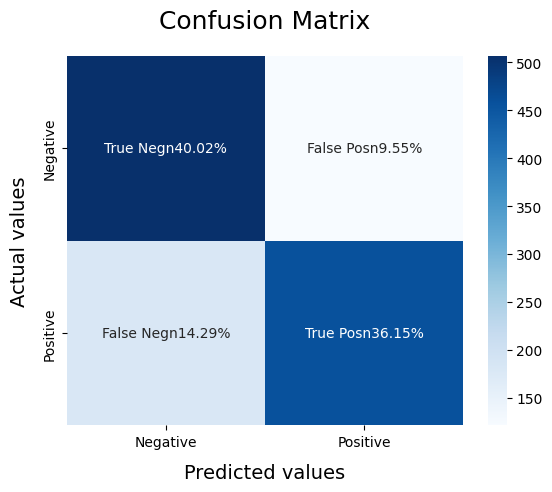

In [44]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

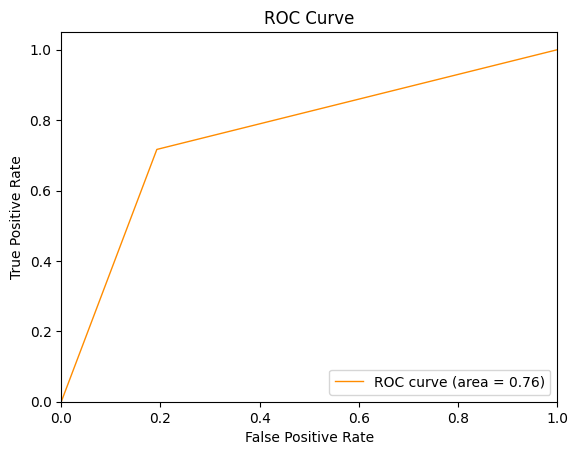

In [45]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_test_binary = (y_test == 'REAL').astype(int)
y_pred1_binary = (y_pred1 == 'REAL').astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred1_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


LINEAR SVC
Linear Support Vector Classifier (LinearSVC) is a variant of the Support Vector Machine (SVM) algorithm used for classification tasks. It's particularly suited for binary classification problems, but it can be extended to multi-class classification as well. 

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.92      0.91      0.92       628
        REAL       0.92      0.92      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



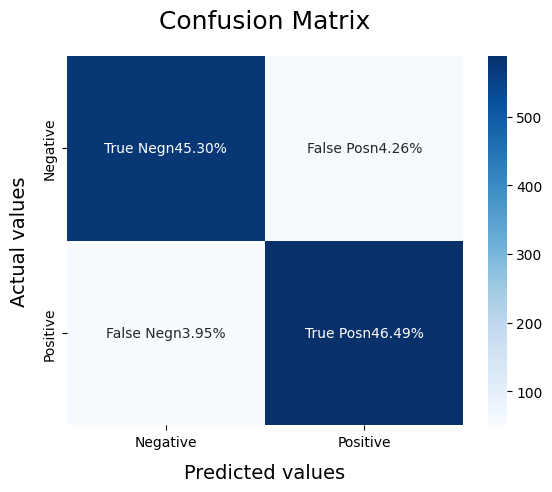

In [46]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

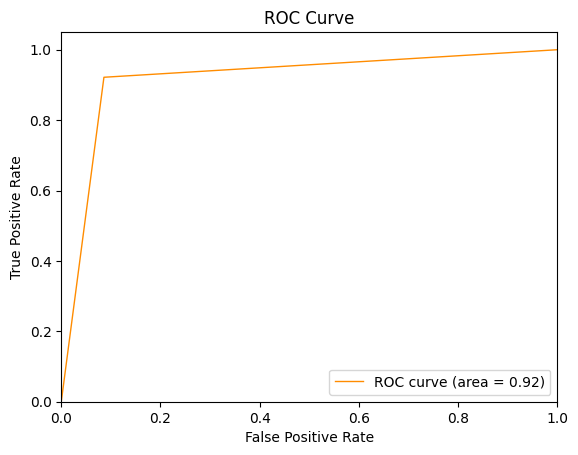

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred2 contain 'FAKE' and 'REAL' labels
# Convert 'FAKE' and 'REAL' labels to binary values, e.g., 0 and 1
y_test_binary = (y_test == 'REAL').astype(int)
y_pred2_binary = (y_pred2 == 'REAL').astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred2_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


LOGISTIC REGRESSION
Logistic Regression is a fundamental machine learning algorithm commonly used for binary classification tasks. It's an extension of linear regression, but instead of predicting a continuous output, it estimates the probability of a binary outcome.

              precision    recall  f1-score   support

        FAKE       0.91      0.91      0.91       628
        REAL       0.91      0.92      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



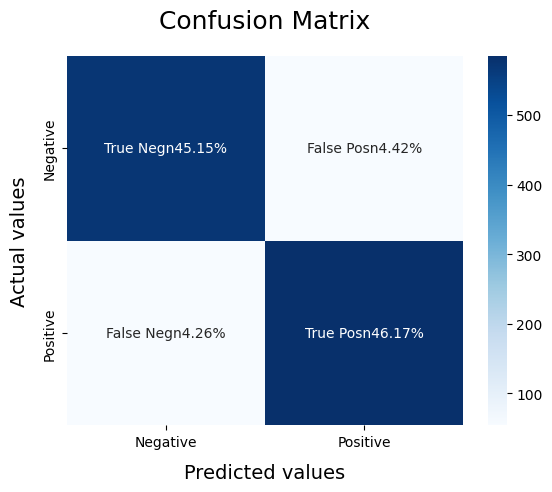

In [48]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

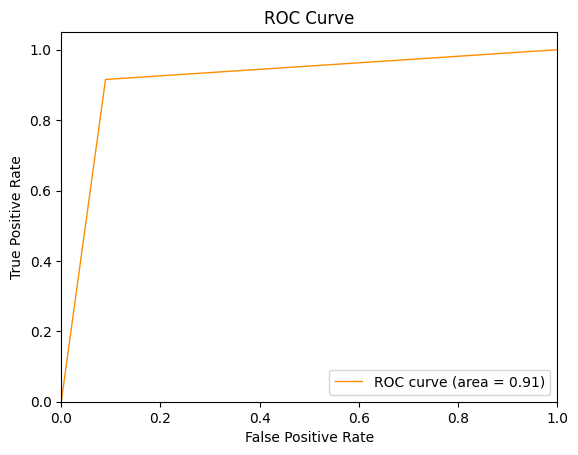

In [49]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_test_binary = (y_test == 'REAL').astype(int)
y_pred3_binary = (y_pred3 == 'REAL').astype(int)

fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred3_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


VOTING CLASSIFIER.
A Voting Classifier is an ensemble machine learning model that combines the predictions of multiple base classifiers to make a final prediction. It is a meta-classifier that aggregates the individual predictions of its component classifiers, and the final prediction is often determined by a majority vote or by taking the class label with the highest probability

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


              precision    recall  f1-score   support

        FAKE       0.90      0.94      0.92       628
        REAL       0.94      0.89      0.91       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



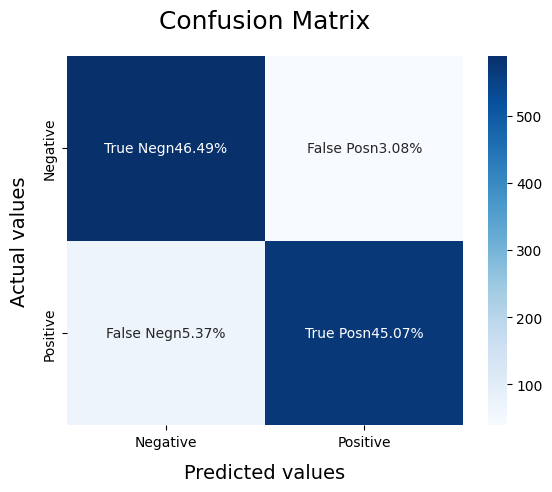

In [57]:
from sklearn.ensemble import VotingClassifier
logistic_classifier = LogisticRegression()
svm_classifier = LinearSVC() 
voting_classifier = VotingClassifier(estimators=[('lr', logistic_classifier), ('svm', svm_classifier)], voting='hard')

# Fit the voting classifier on the training data
voting_classifier.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred = voting_classifier.predict(X_test)
model_Evaluate(voting_classifier)

In [53]:
# USING SVC MODEL FOR CLASSIFICATION

import pickle
with open('SVCmodel_with_vectorizer.pkl', 'wb') as model_file:
    pickle.dump({'model': SVCmodel, 'vectorizer': vectoriser}, model_file)
loaded_model=pickle.load(open('SVCmodel.pkl','rb'))
ip=input()
ip=remove_non_alphabetic(ip)
ip=preprocess_text(ip)
df_ip = pd.DataFrame({'text': [ip]})
df_ip_test = vectoriser.transform(df_ip['text'])
dd=loaded_model.predict(df_ip_test)
print(dd)

# Examples of REAL
# Trump cherry-picked the part of Clinton’s response that said problems in the VA have “not been as widespread as it has been made out to be,” to make the blanket claim that Clinton is “satisfied with what was going on in the Veterans Administration” and that “vets are being treated, essentially, just fine.” But Trump is leaving out the parts of Clinton’s answer that acknowledged problems in the VA — including the wait time issue Trump highlighted as one of his biggest concerns.
# Trump is the president of US

# FAKE
# Trump is the president of Israel
# This is a real news



array(['REAL'], dtype=object)

In [59]:
# For Voting_Classifier, which contain Linear SVC and Logistic Regression
ip=input()
ip=remove_non_alphabetic(ip)
ip=preprocess_text(ip)
df_ip = pd.DataFrame({'text': [ip]})
df_ip_test = vectoriser.transform(df_ip['text'])
dd=voting_classifier.predict(df_ip_test)
print(dd)

['REAL']
